Score: 6.779339776408203
Runtime: 156ms
['EVAL: 25', 'DIV_ISLAND_1: {1=12}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 0.011141908529861716', 'FIT_ISLAND_1: 0.07806528862439949', 'AVG_ISLAND_2: 9.265656060534461E-4', 'FIT_ISLAND_2: 0.004215273686144097']
{'eval': 25, 'div_1': {1: 12, 2: 0}, 'div_2': {2: 12, 1: 0}, 'avg_1': 0.011141908529861716, 'fit_1': 0.07806528862439949, 'avg_2': 0.0009265656060534461, 'fit_2': 0.004215273686144097}
['EVAL: 30', 'DIV_ISLAND_1: {1=11, 2=1}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 0.059326512305790634', 'FIT_ISLAND_1: 0.5728903539511877', 'AVG_ISLAND_2: 0.002308845487232311', 'FIT_ISLAND_2: 0.00860700611173714']
{'eval': 30, 'div_1': {1: 11, 2: 1}, 'div_2': {2: 12, 1: 0}, 'avg_1': 0.059326512305790634, 'fit_1': 0.5728903539511877, 'avg_2': 0.002308845487232311, 'fit_2': 0.00860700611173714}
['EVAL: 35', 'DIV_ISLAND_1: {1=12}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 0.12408985251002669', 'FIT_ISLAND_1: 0.5728903539511877', 'AVG_ISLAND_2: 0.003948886937217

['EVAL: 490', 'DIV_ISLAND_1: {2=12}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 5.187403575201063', 'FIT_ISLAND_1: 6.378895317285309', 'AVG_ISLAND_2: 3.5009399256421507', 'FIT_ISLAND_2: 3.5009399256421507']
{'eval': 490, 'div_1': {2: 12, 1: 0}, 'div_2': {2: 12, 1: 0}, 'avg_1': 5.187403575201063, 'fit_1': 6.378895317285309, 'avg_2': 3.5009399256421507, 'fit_2': 3.5009399256421507}
['EVAL: 495', 'DIV_ISLAND_1: {2=12}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 5.408688965245678', 'FIT_ISLAND_1: 6.378895317285309', 'AVG_ISLAND_2: 3.5009399256421507', 'FIT_ISLAND_2: 3.5009399256421507']
{'eval': 495, 'div_1': {2: 12, 1: 0}, 'div_2': {2: 12, 1: 0}, 'avg_1': 5.408688965245678, 'fit_1': 6.378895317285309, 'avg_2': 3.5009399256421507, 'fit_2': 3.5009399256421507}
['EVAL: 500', 'DIV_ISLAND_1: {2=12}', 'DIV_ISLAND_2: {2=12}', 'AVG_ISLAND_1: 5.411410937285323', 'FIT_ISLAND_1: 6.378895317285309', 'AVG_ISLAND_2: 3.5009399256421507', 'FIT_ISLAND_2: 3.5009399256421507']
{'eval': 500, 'div_1': {2: 12, 1: 0}

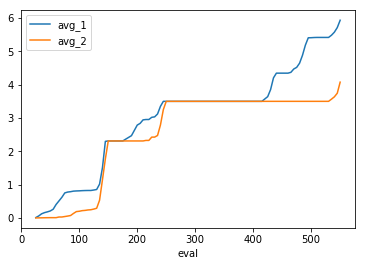

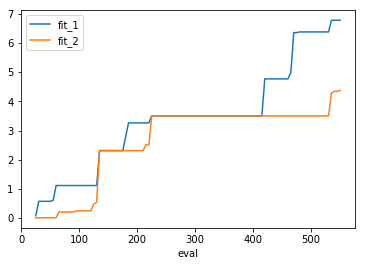

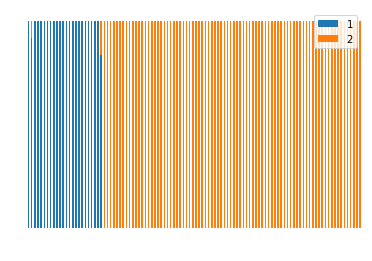

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

evals = []

def getVal(entry): 
    return entry.split(": ")[1]

def diversity(values, num_isl):
    values = values[1:-1].replace(" ", "") # remove {}
    values = values.split(',')
    value_dict = {int(value.split('=')[0]): int(value.split('=')[1]) for value in values}
    
    for i in range(num_isl):
        if((i+1) not in value_dict.keys()):
            value_dict[(i+1)] = 0
    
    # print (value_dict)
    return value_dict

# global params pop_size, 
config_params = 4
num_isl = 0
with open('output.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content];
    num_isl = int(content[1].split(": ")[1])
    print (content[-2])
    print (content[-1])    
    for index, value in enumerate(content):
        if ("EVAL:" in value):
            dict_islands = {}
            dict_islands['eval'] = int(value.split(": ")[1])
            offset=0
                    
            print (content[index:index+7])
            # diversity
            for i in range(num_isl):
                dict_islands['div_'+str(i+1)] = diversity(getVal(content[index+1+i]),num_isl)

            for i in range(num_isl):
                dict_islands['avg_'+str(i+1)] = float(getVal(content[index+num_isl+1+offset]))
                dict_islands['fit_'+str(i+1)] = float(getVal(content[index+num_isl+2+offset]))
                # we do 2 measurements per island
                offset+=2
            evals.append(dict_islands)
            
            print (dict_islands)
            
df = pd.DataFrame(evals)

df.plot(x='eval', y=['avg_'+str(i+1) for i in range(num_isl)])
df.plot(x='eval', y=['fit_'+str(i+1) for i in range(num_isl)])

plt.show()

# so div_1 is the diversity on island 1
# blue shows how many individuals originate from island 1, orange from 2
df_div = pd.DataFrame.from_dict(dict(df.div_1), orient='index')
df_div.plot(kind="bar", stacked=True)
plt.axis('off')
plt.show()
    